In [ ]:
import torch 
from torch import nn 
import torch.optim as optim
from torch.utils.data import DataLoader 
from torchvision import datasets 
from torchvision.transforms import transforms 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

# discriminator neural network architecture 
class discriminator(nn.Module): 
  def __init__(self): 
    super(discriminator, self).__init__()
    self.main = nn.Sequential(
        nn.Linear(28*28, 256), 
        nn.LeakyReLU(0.2),
        nn.Linear(256, 256), 
        nn.LeakyReLU(0.2), 
        nn.Linear(256, 1),
        nn.Sigmoid()
    )

  def forward(self, x): 
    pred = self.main(x)
    return pred 

# generator neural network architecture
class generator(nn.Module):
  def __init__(self): 
    super(generator, self).__init__()
    self.main = nn.Sequential(
        nn.Linear(128, 1024), 
        nn.ReLU(), 
        nn.Linear(1024, 1024), 
        nn.ReLU(), 
        nn.Linear(1024, 784),
        nn.Tanh()
    )

  def forward(self, x): 
    pred = self.main(x)
    return pred

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

G = generator().to(device) 
D = discriminator().to(device)
print(G)
print(D)

Device: cuda
generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Tanh()
  )
)
discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [ ]:
# Loss functions: 
def d_loss_function(X, y): 
  loss_fn = nn.BCELoss()
  return loss_fn(X, y)

def g_loss_function(X):
  y = torch.ones([X.shape[0], 1])
  y = y.to(device)
  loss_fn = nn.BCELoss()
  return loss_fn(X, y)

In [ ]:
# Hyperparameters: 
epochs = 200
learning_rate = 0.0002
batch_size = 64 

# Optimization algorithms:
g_optimizer = optim.Adam(G.parameters(), lr=learning_rate, betas=(0.5, 0.999))
d_optimizer = optim.Adam(D.parameters(), lr=learning_rate, betas=(0.5, 0.999))

# Transformation 
# Compose = composes several transformations together. 
# 1. ToTensor() transforms image to Tensor and normalizes pixel intensity 
# values in range 0, 1. 
#.2. Normalize tensor image with mean and standard deviation for n channels. 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])

In [ ]:
# Load data: 

train_data = datasets.MNIST(
    root="data", 
    train=True, 
    download=True, 
    transform=transform
)

test_data = datasets.MNIST(
    root="data", 
    train=False, 
    download=True, 
    transform=transform
)

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

[1/200, 100/938] D_loss: 0.760 G_loss: 0.676
[1/200, 200/938] D_loss: 0.730 G_loss: 0.708
[1/200, 300/938] D_loss: 0.667 G_loss: 0.875
[1/200, 400/938] D_loss: 0.643 G_loss: 0.878
[1/200, 500/938] D_loss: 0.597 G_loss: 1.143
[1/200, 600/938] D_loss: 0.603 G_loss: 0.949
[1/200, 700/938] D_loss: 0.374 G_loss: 1.890
[1/200, 800/938] D_loss: 0.493 G_loss: 1.081
[1/200, 900/938] D_loss: 0.621 G_loss: 1.354
[1/200, 938/938] D_loss: 0.493 G_loss: 1.580


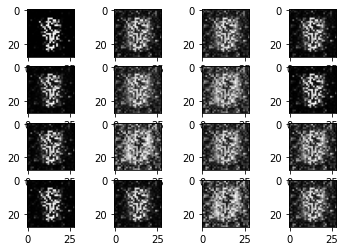

[2/200, 100/938] D_loss: 0.484 G_loss: 0.924
[2/200, 200/938] D_loss: 0.230 G_loss: 2.230
[2/200, 300/938] D_loss: 0.311 G_loss: 4.684
[2/200, 400/938] D_loss: 0.396 G_loss: 1.600
[2/200, 500/938] D_loss: 0.304 G_loss: 1.829
[2/200, 600/938] D_loss: 0.300 G_loss: 2.630
[2/200, 700/938] D_loss: 0.463 G_loss: 1.758
[2/200, 800/938] D_loss: 0.443 G_loss: 1.524
[2/200, 900/938] D_loss: 0.378 G_loss: 2.008
[2/200, 938/938] D_loss: 0.445 G_loss: 1.225


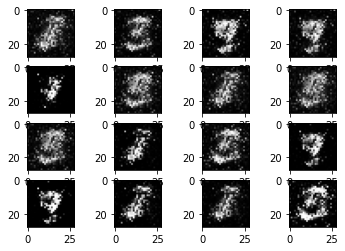

[3/200, 100/938] D_loss: 0.368 G_loss: 1.667
[3/200, 200/938] D_loss: 0.497 G_loss: 1.319
[3/200, 300/938] D_loss: 0.675 G_loss: 0.499
[3/200, 400/938] D_loss: 0.395 G_loss: 1.820
[3/200, 500/938] D_loss: 0.385 G_loss: 1.860
[3/200, 600/938] D_loss: 0.328 G_loss: 1.740
[3/200, 700/938] D_loss: 0.405 G_loss: 2.274
[3/200, 800/938] D_loss: 0.431 G_loss: 1.864
[3/200, 900/938] D_loss: 0.356 G_loss: 1.520
[3/200, 938/938] D_loss: 0.291 G_loss: 2.267


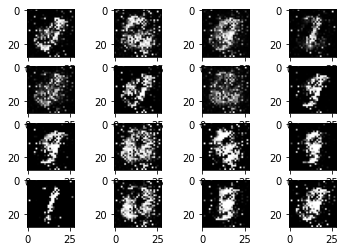

[4/200, 100/938] D_loss: 0.384 G_loss: 3.110
[4/200, 200/938] D_loss: 0.328 G_loss: 2.017
[4/200, 300/938] D_loss: 0.284 G_loss: 2.176
[4/200, 400/938] D_loss: 0.408 G_loss: 1.637
[4/200, 500/938] D_loss: 0.400 G_loss: 3.069
[4/200, 600/938] D_loss: 0.328 G_loss: 2.737
[4/200, 700/938] D_loss: 0.435 G_loss: 2.779
[4/200, 800/938] D_loss: 0.375 G_loss: 1.421
[4/200, 900/938] D_loss: 0.486 G_loss: 1.139
[4/200, 938/938] D_loss: 0.514 G_loss: 3.852


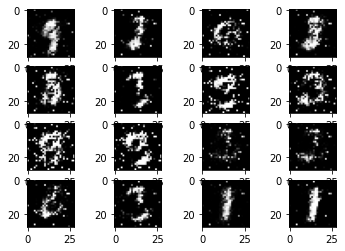

[5/200, 100/938] D_loss: 0.476 G_loss: 1.435
[5/200, 200/938] D_loss: 0.573 G_loss: 2.459
[5/200, 300/938] D_loss: 0.411 G_loss: 1.530
[5/200, 400/938] D_loss: 0.458 G_loss: 2.002
[5/200, 500/938] D_loss: 0.433 G_loss: 1.648
[5/200, 600/938] D_loss: 0.463 G_loss: 1.267
[5/200, 700/938] D_loss: 0.520 G_loss: 0.973
[5/200, 800/938] D_loss: 0.453 G_loss: 0.995
[5/200, 900/938] D_loss: 0.350 G_loss: 1.800
[5/200, 938/938] D_loss: 0.579 G_loss: 0.791


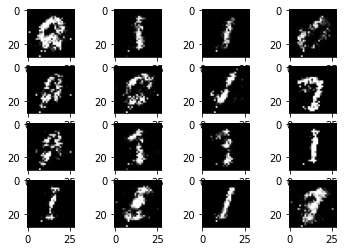

[6/200, 100/938] D_loss: 0.637 G_loss: 3.127
[6/200, 200/938] D_loss: 0.418 G_loss: 1.949
[6/200, 300/938] D_loss: 0.630 G_loss: 2.684
[6/200, 400/938] D_loss: 0.588 G_loss: 1.625
[6/200, 500/938] D_loss: 0.635 G_loss: 1.067
[6/200, 600/938] D_loss: 0.377 G_loss: 1.823
[6/200, 700/938] D_loss: 0.389 G_loss: 1.277
[6/200, 800/938] D_loss: 0.494 G_loss: 2.924
[6/200, 900/938] D_loss: 0.445 G_loss: 1.926
[6/200, 938/938] D_loss: 0.656 G_loss: 1.444


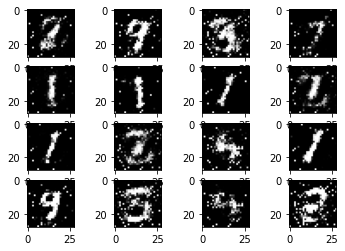

[7/200, 100/938] D_loss: 0.396 G_loss: 1.750
[7/200, 200/938] D_loss: 0.562 G_loss: 1.131
[7/200, 300/938] D_loss: 0.608 G_loss: 2.486
[7/200, 400/938] D_loss: 0.617 G_loss: 1.606
[7/200, 500/938] D_loss: 0.412 G_loss: 1.551
[7/200, 600/938] D_loss: 0.513 G_loss: 2.086
[7/200, 700/938] D_loss: 0.536 G_loss: 0.872
[7/200, 800/938] D_loss: 0.522 G_loss: 1.473
[7/200, 900/938] D_loss: 0.458 G_loss: 0.999
[7/200, 938/938] D_loss: 0.570 G_loss: 1.263


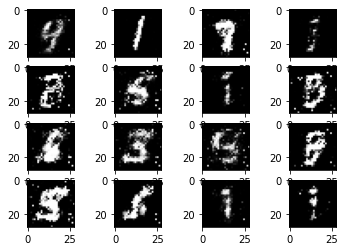

[8/200, 100/938] D_loss: 0.481 G_loss: 0.929
[8/200, 200/938] D_loss: 0.614 G_loss: 0.829
[8/200, 300/938] D_loss: 0.613 G_loss: 1.727
[8/200, 400/938] D_loss: 0.574 G_loss: 0.937
[8/200, 500/938] D_loss: 0.534 G_loss: 1.180
[8/200, 600/938] D_loss: 0.495 G_loss: 1.372
[8/200, 700/938] D_loss: 0.580 G_loss: 1.341
[8/200, 800/938] D_loss: 0.603 G_loss: 0.606
[8/200, 900/938] D_loss: 0.589 G_loss: 1.129
[8/200, 938/938] D_loss: 0.633 G_loss: 1.627


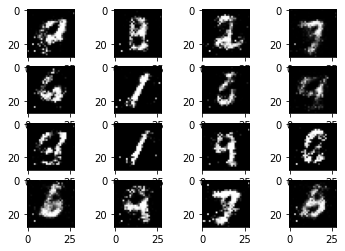

[9/200, 100/938] D_loss: 0.558 G_loss: 1.746
[9/200, 200/938] D_loss: 0.629 G_loss: 0.813
[9/200, 300/938] D_loss: 0.633 G_loss: 1.142
[9/200, 400/938] D_loss: 0.568 G_loss: 1.049
[9/200, 500/938] D_loss: 0.550 G_loss: 1.455
[9/200, 600/938] D_loss: 0.574 G_loss: 0.879
[9/200, 700/938] D_loss: 0.564 G_loss: 1.008
[9/200, 800/938] D_loss: 0.577 G_loss: 1.022
[9/200, 900/938] D_loss: 0.584 G_loss: 1.167
[9/200, 938/938] D_loss: 0.726 G_loss: 0.476


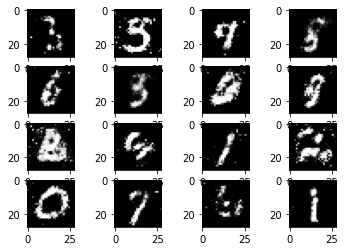

[10/200, 100/938] D_loss: 0.541 G_loss: 1.410
[10/200, 200/938] D_loss: 0.635 G_loss: 0.606
[10/200, 300/938] D_loss: 0.570 G_loss: 1.147
[10/200, 400/938] D_loss: 0.606 G_loss: 0.704
[10/200, 500/938] D_loss: 0.552 G_loss: 1.025
[10/200, 600/938] D_loss: 0.619 G_loss: 0.884
[10/200, 700/938] D_loss: 0.590 G_loss: 0.970
[10/200, 800/938] D_loss: 0.564 G_loss: 0.895
[10/200, 900/938] D_loss: 0.543 G_loss: 0.845
[10/200, 938/938] D_loss: 0.653 G_loss: 0.625


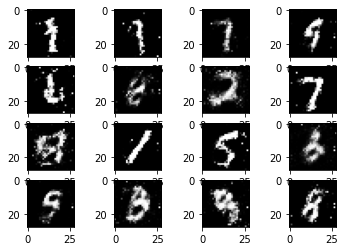

[11/200, 100/938] D_loss: 0.591 G_loss: 1.139
[11/200, 200/938] D_loss: 0.581 G_loss: 1.237
[11/200, 300/938] D_loss: 0.650 G_loss: 0.862
[11/200, 400/938] D_loss: 0.557 G_loss: 1.222
[11/200, 500/938] D_loss: 0.627 G_loss: 0.610
[11/200, 600/938] D_loss: 0.585 G_loss: 0.940
[11/200, 700/938] D_loss: 0.659 G_loss: 0.808
[11/200, 800/938] D_loss: 0.568 G_loss: 0.722
[11/200, 900/938] D_loss: 0.599 G_loss: 1.161
[11/200, 938/938] D_loss: 0.568 G_loss: 1.101


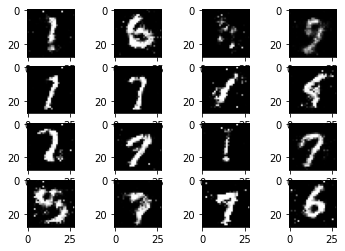

[12/200, 100/938] D_loss: 0.577 G_loss: 0.935
[12/200, 200/938] D_loss: 0.569 G_loss: 0.783
[12/200, 300/938] D_loss: 0.603 G_loss: 1.310
[12/200, 400/938] D_loss: 0.633 G_loss: 0.707
[12/200, 500/938] D_loss: 0.632 G_loss: 0.680
[12/200, 600/938] D_loss: 0.669 G_loss: 1.296
[12/200, 700/938] D_loss: 0.660 G_loss: 1.438
[12/200, 800/938] D_loss: 0.631 G_loss: 0.594
[12/200, 900/938] D_loss: 0.557 G_loss: 0.899
[12/200, 938/938] D_loss: 0.653 G_loss: 1.236


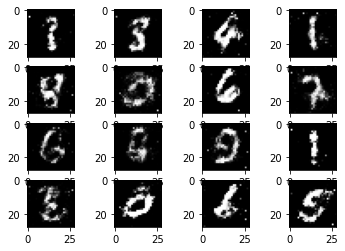

[13/200, 100/938] D_loss: 0.619 G_loss: 0.928
[13/200, 200/938] D_loss: 0.636 G_loss: 0.985
[13/200, 300/938] D_loss: 0.578 G_loss: 0.800
[13/200, 400/938] D_loss: 0.575 G_loss: 0.851
[13/200, 500/938] D_loss: 0.612 G_loss: 0.972
[13/200, 600/938] D_loss: 0.609 G_loss: 1.259
[13/200, 700/938] D_loss: 0.632 G_loss: 1.228
[13/200, 800/938] D_loss: 0.598 G_loss: 0.878
[13/200, 900/938] D_loss: 0.601 G_loss: 0.991
[13/200, 938/938] D_loss: 0.686 G_loss: 1.065


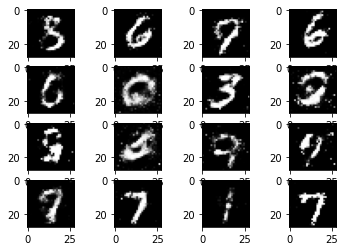

[14/200, 100/938] D_loss: 0.596 G_loss: 1.264
[14/200, 200/938] D_loss: 0.649 G_loss: 1.024
[14/200, 300/938] D_loss: 0.620 G_loss: 0.824
[14/200, 400/938] D_loss: 0.602 G_loss: 0.835
[14/200, 500/938] D_loss: 0.615 G_loss: 0.840
[14/200, 600/938] D_loss: 0.687 G_loss: 0.695
[14/200, 700/938] D_loss: 0.636 G_loss: 1.028
[14/200, 800/938] D_loss: 0.679 G_loss: 0.625
[14/200, 900/938] D_loss: 0.597 G_loss: 0.840
[14/200, 938/938] D_loss: 0.620 G_loss: 1.179


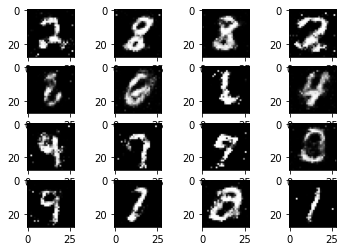

[15/200, 100/938] D_loss: 0.641 G_loss: 1.172
[15/200, 200/938] D_loss: 0.627 G_loss: 0.897
[15/200, 300/938] D_loss: 0.667 G_loss: 0.809
[15/200, 400/938] D_loss: 0.625 G_loss: 0.913
[15/200, 500/938] D_loss: 0.644 G_loss: 0.824
[15/200, 600/938] D_loss: 0.611 G_loss: 0.884
[15/200, 700/938] D_loss: 0.655 G_loss: 1.297
[15/200, 800/938] D_loss: 0.599 G_loss: 0.708
[15/200, 900/938] D_loss: 0.667 G_loss: 0.907
[15/200, 938/938] D_loss: 0.600 G_loss: 0.697


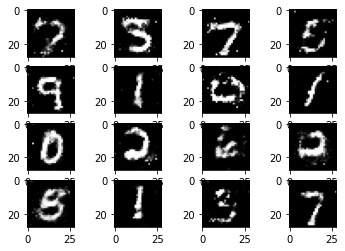

[16/200, 100/938] D_loss: 0.642 G_loss: 0.820
[16/200, 200/938] D_loss: 0.650 G_loss: 1.199
[16/200, 300/938] D_loss: 0.624 G_loss: 0.892
[16/200, 400/938] D_loss: 0.652 G_loss: 0.887
[16/200, 500/938] D_loss: 0.636 G_loss: 0.761
[16/200, 600/938] D_loss: 0.641 G_loss: 0.598
[16/200, 700/938] D_loss: 0.606 G_loss: 1.069
[16/200, 800/938] D_loss: 0.647 G_loss: 0.874
[16/200, 900/938] D_loss: 0.686 G_loss: 0.590
[16/200, 938/938] D_loss: 0.565 G_loss: 0.715


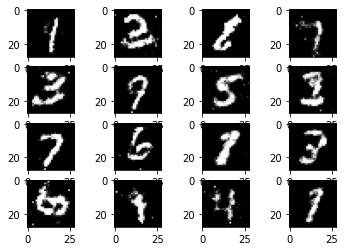

[17/200, 100/938] D_loss: 0.639 G_loss: 0.855
[17/200, 200/938] D_loss: 0.630 G_loss: 0.996
[17/200, 300/938] D_loss: 0.635 G_loss: 0.817
[17/200, 400/938] D_loss: 0.633 G_loss: 0.778
[17/200, 500/938] D_loss: 0.690 G_loss: 0.958
[17/200, 600/938] D_loss: 0.647 G_loss: 0.831
[17/200, 700/938] D_loss: 0.612 G_loss: 1.082
[17/200, 800/938] D_loss: 0.598 G_loss: 1.013
[17/200, 900/938] D_loss: 0.626 G_loss: 0.863
[17/200, 938/938] D_loss: 0.625 G_loss: 0.741


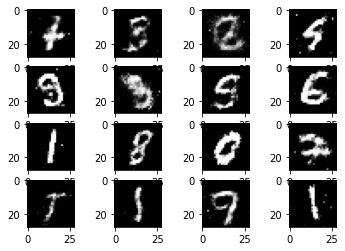

[18/200, 100/938] D_loss: 0.653 G_loss: 0.778
[18/200, 200/938] D_loss: 0.655 G_loss: 1.016
[18/200, 300/938] D_loss: 0.665 G_loss: 0.882
[18/200, 400/938] D_loss: 0.663 G_loss: 0.836
[18/200, 500/938] D_loss: 0.622 G_loss: 0.955
[18/200, 600/938] D_loss: 0.606 G_loss: 0.815
[18/200, 700/938] D_loss: 0.675 G_loss: 0.634
[18/200, 800/938] D_loss: 0.688 G_loss: 0.925
[18/200, 900/938] D_loss: 0.620 G_loss: 0.684
[18/200, 938/938] D_loss: 0.633 G_loss: 1.084


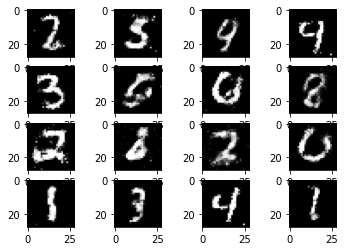

[19/200, 100/938] D_loss: 0.604 G_loss: 0.907
[19/200, 200/938] D_loss: 0.615 G_loss: 0.817
[19/200, 300/938] D_loss: 0.625 G_loss: 0.830
[19/200, 400/938] D_loss: 0.630 G_loss: 0.983
[19/200, 500/938] D_loss: 0.637 G_loss: 0.737
[19/200, 600/938] D_loss: 0.660 G_loss: 0.577
[19/200, 700/938] D_loss: 0.679 G_loss: 0.726
[19/200, 800/938] D_loss: 0.596 G_loss: 0.814
[19/200, 900/938] D_loss: 0.640 G_loss: 1.053
[19/200, 938/938] D_loss: 0.639 G_loss: 0.859


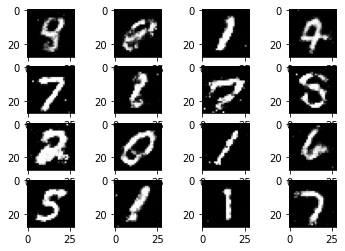

[20/200, 100/938] D_loss: 0.614 G_loss: 0.828
[20/200, 200/938] D_loss: 0.641 G_loss: 0.904
[20/200, 300/938] D_loss: 0.611 G_loss: 0.713
[20/200, 400/938] D_loss: 0.698 G_loss: 1.087
[20/200, 500/938] D_loss: 0.722 G_loss: 1.146
[20/200, 600/938] D_loss: 0.630 G_loss: 0.762
[20/200, 700/938] D_loss: 0.635 G_loss: 0.880
[20/200, 800/938] D_loss: 0.623 G_loss: 0.935
[20/200, 900/938] D_loss: 0.659 G_loss: 0.870
[20/200, 938/938] D_loss: 0.638 G_loss: 1.029


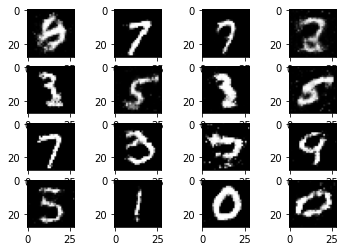

[21/200, 100/938] D_loss: 0.626 G_loss: 1.123
[21/200, 200/938] D_loss: 0.619 G_loss: 0.985
[21/200, 300/938] D_loss: 0.627 G_loss: 0.695
[21/200, 400/938] D_loss: 0.621 G_loss: 0.903
[21/200, 500/938] D_loss: 0.621 G_loss: 0.918
[21/200, 600/938] D_loss: 0.642 G_loss: 0.620
[21/200, 700/938] D_loss: 0.657 G_loss: 0.602
[21/200, 800/938] D_loss: 0.658 G_loss: 0.814
[21/200, 900/938] D_loss: 0.635 G_loss: 0.930
[21/200, 938/938] D_loss: 0.585 G_loss: 0.754


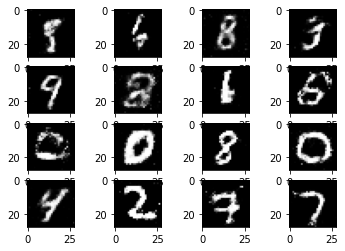

[22/200, 100/938] D_loss: 0.646 G_loss: 0.949
[22/200, 200/938] D_loss: 0.617 G_loss: 0.982
[22/200, 300/938] D_loss: 0.672 G_loss: 0.955
[22/200, 400/938] D_loss: 0.586 G_loss: 0.852
[22/200, 500/938] D_loss: 0.632 G_loss: 0.846
[22/200, 600/938] D_loss: 0.584 G_loss: 0.881
[22/200, 700/938] D_loss: 0.616 G_loss: 0.864
[22/200, 800/938] D_loss: 0.642 G_loss: 0.763
[22/200, 900/938] D_loss: 0.694 G_loss: 0.657
[22/200, 938/938] D_loss: 0.660 G_loss: 0.890


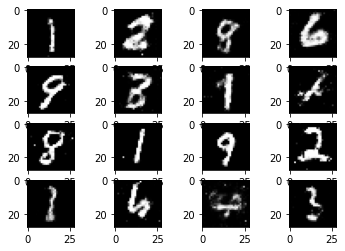

[23/200, 100/938] D_loss: 0.625 G_loss: 0.843
[23/200, 200/938] D_loss: 0.658 G_loss: 1.280
[23/200, 300/938] D_loss: 0.655 G_loss: 0.822
[23/200, 400/938] D_loss: 0.614 G_loss: 0.787
[23/200, 500/938] D_loss: 0.656 G_loss: 1.065
[23/200, 600/938] D_loss: 0.637 G_loss: 0.792
[23/200, 700/938] D_loss: 0.642 G_loss: 1.035
[23/200, 800/938] D_loss: 0.611 G_loss: 0.843
[23/200, 900/938] D_loss: 0.596 G_loss: 0.822
[23/200, 938/938] D_loss: 0.655 G_loss: 1.083


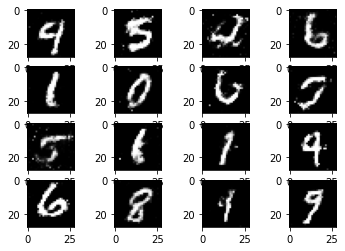

[24/200, 100/938] D_loss: 0.612 G_loss: 0.836
[24/200, 200/938] D_loss: 0.625 G_loss: 0.768
[24/200, 300/938] D_loss: 0.597 G_loss: 1.008
[24/200, 400/938] D_loss: 0.757 G_loss: 0.535
[24/200, 500/938] D_loss: 0.630 G_loss: 0.679
[24/200, 600/938] D_loss: 0.664 G_loss: 0.974
[24/200, 700/938] D_loss: 0.604 G_loss: 0.733
[24/200, 800/938] D_loss: 0.634 G_loss: 0.989
[24/200, 900/938] D_loss: 0.638 G_loss: 0.767
[24/200, 938/938] D_loss: 0.704 G_loss: 0.870


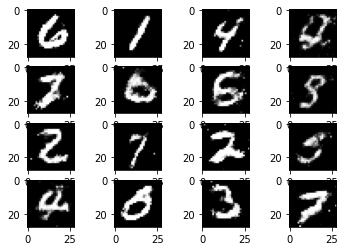

[25/200, 100/938] D_loss: 0.619 G_loss: 0.954
[25/200, 200/938] D_loss: 0.616 G_loss: 0.703
[25/200, 300/938] D_loss: 0.653 G_loss: 0.974
[25/200, 400/938] D_loss: 0.697 G_loss: 0.937
[25/200, 500/938] D_loss: 0.622 G_loss: 0.699
[25/200, 600/938] D_loss: 0.630 G_loss: 1.060
[25/200, 700/938] D_loss: 0.634 G_loss: 0.906
[25/200, 800/938] D_loss: 0.648 G_loss: 0.942
[25/200, 900/938] D_loss: 0.593 G_loss: 0.742
[25/200, 938/938] D_loss: 0.705 G_loss: 1.196


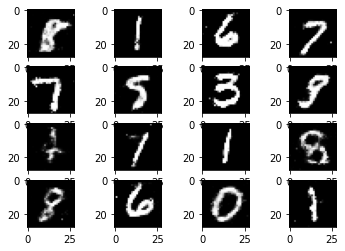

[26/200, 100/938] D_loss: 0.594 G_loss: 1.018
[26/200, 200/938] D_loss: 0.616 G_loss: 0.792
[26/200, 300/938] D_loss: 0.622 G_loss: 0.788
[26/200, 400/938] D_loss: 0.650 G_loss: 0.632


KeyboardInterrupt: ignored

In [ ]:
def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))

    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))

# Train
for epoch in range(epochs):
    epoch += 1

    for times, data in enumerate(train_dataloader):
        times += 1
        real_inputs = data[0].to(device)
        test = 255 * (0.5 * real_inputs[0] + 0.5)

        real_inputs = real_inputs.view(-1, 784)
        real_outputs = D(real_inputs)
        real_label = torch.ones(real_inputs.shape[0], 1).to(device)

        noise = (torch.rand(real_inputs.shape[0], 128) - 0.5) / 0.5
        noise = noise.to(device)
        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)
        fake_label = torch.zeros(fake_inputs.shape[0], 1).to(device)

        outputs = torch.cat((real_outputs, fake_outputs), 0)
        targets = torch.cat((real_label, fake_label), 0)

        # Zero the parameter gradients
        d_optimizer.zero_grad()

        # Backward propagation
        d_loss = d_loss_function(outputs, targets)
        d_loss.backward()
        d_optimizer.step()

        # Generator
        noise = (torch.rand(real_inputs.shape[0], 128)-0.5)/0.5
        noise = noise.to(device)

        fake_inputs = G(noise)
        fake_outputs = D(fake_inputs)

        g_loss = g_loss_function(fake_outputs)
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        if times % 100 == 0 or times == len(train_dataloader):
            print('[{}/{}, {}/{}] D_loss: {:.3f} G_loss: {:.3f}'.format(epoch, epochs, times, len(train_dataloader), d_loss.item(), g_loss.item()))

    imgs_numpy = (fake_inputs.data.cpu().numpy()+1.0)/2.0
    show_images(imgs_numpy[:16])
    plt.show()

    if epoch % 50 == 0:
        torch.save(G, 'Generator_epoch_{}.pth'.format(epoch))
        print('Model saved.')

GPU State: cuda:0


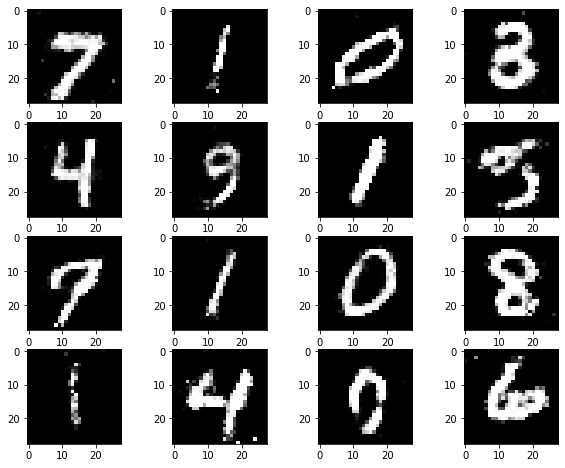

In [ ]:
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))

    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

# Model
G.eval()

# Generator
noise = (torch.rand(16, 128)-0.5) / 0.5
noise = noise.to(device)

fake_image = G(noise)
imgs_numpy = (fake_image.data.cpu().numpy()+1.0)/2.0
show_images(imgs_numpy)
plt.show()